# Sensor notebook

This notebook is supposed to show how my sensor implementation works.

My Sensor class derives from threading.Thread. As arguments, it takes:
* an instance of the athlete class presented in the athlete notebook,
* a queue to which the results from the athlete object are added (I use the thread-save implementation from Queue.Queue),
* a sensor ID,
* a rate in MHz at which the athlete is querried (default 20 MHz),
* the standard deviation of the white noise which is added to the athlete results (in meters, default 0.3).

The results in the queue are again given by a named tuple (MeasurementSpec) and contain the sensor ID, the noisy coordinates, and the time of the measurement.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
sns.set_context('poster')

In [5]:
import numpy as np

In [6]:
from time import sleep

In [7]:
from streamanalysis import Athlete, Sensor

In [8]:
from Queue import Queue

In [9]:
athlete = Athlete(keepData=True, seed = 1)
ID = '0'
q = Queue()

In [10]:
athlete.reset()
sensor = Sensor(athlete = athlete, queue = q, ID = ID, verbose = True)
sensor.start()
# Run the thread for 5 minutes
runtime = 60 * 5
sleep(runtime)
sensor.stop()

Sensor 0 started


In [11]:
# Get measured data from queue
measurements = []
while not sensor.queue.empty():
    measurements.append(sensor.queue.get_nowait())

Sensor 0 stopped


In [12]:
# Compare number of measurements to ellapsed time 
nmeas = len(measurements)
print nmeas, runtime * 20

6000 6000


In [13]:
# Print first data element
print measurements[0].ID
print measurements[0].coords
print measurements[0].time

0
[ 49.57262854  49.74095758]
2016-07-12 15:14:43.857057


In [15]:
# Get time information from measurements
delta_time = []
for i in range(nmeas-1):
    dt = measurements[i+1].time-measurements[i].time
    delta_time.append(dt.total_seconds())
ellapsed = np.append(0,np.cumsum(delta_time))/60.

In [16]:
# Precision of timing in data collection
print 'Mean time-spacing:', np.mean(delta_time)
print 'Error on time-spacing:', np.std(delta_time)
print 'Total ellapsed time:', ellapsed[-1]

Mean time-spacing: 0.0500003642274
Error on time-spacing: 0.00116863065913
Total ellapsed time: 4.99920308333


In [17]:
# Get true data from athlete
data = np.asarray(athlete.data)

In [18]:
# Get measured and true positions
obs_coords = np.asarray([m.coords for m in measurements])
true_pos = data[:,0]

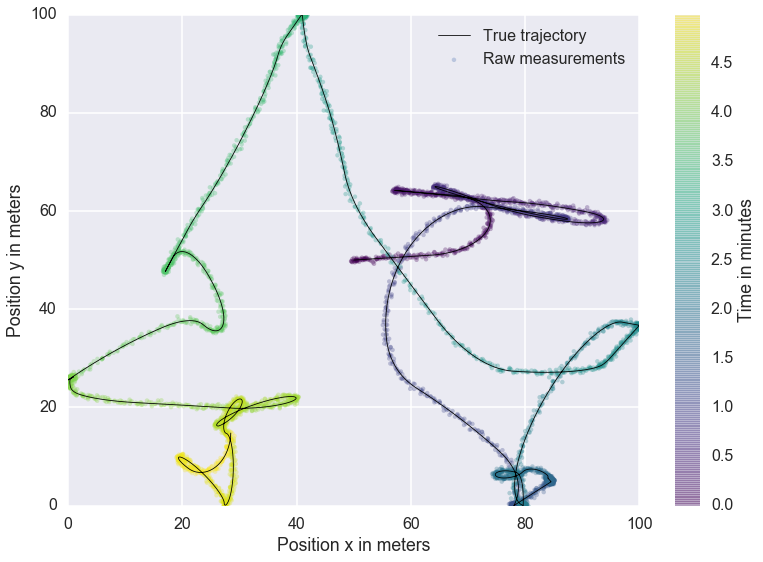

In [19]:
plt.scatter(obs_coords[:,0], obs_coords[:,1], c = ellapsed, alpha = .3, cmap = 'viridis',
            edgecolors='none', label = 'Raw measurements')
plt.plot(true_pos[:,0],true_pos[:,1], color = 'k', label = 'True trajectory', lw = .8)
plt.legend(loc = 0)
plt.xlim(0,100)
plt.xlabel('Position x in meters')
plt.ylim(0,100)
plt.ylabel('Position y in meters')
_=plt.colorbar(label = 'Time in minutes')

In [20]:
# Error should be 0.3 meters
print (obs_coords - true_pos).std()

0.302012743313
